### **Necessary Imports**

In [1]:
import os
import random
import cv2
import numpy as np
import pandas as pd
import seaborn as sns
from statistics import mean, median, mode
from collections import defaultdict
import matplotlib.pyplot as plt
import plotly.express as px

In [2]:
PATH = 'C:/Users/Groot/Code/oral_cancer'
DATASETS_PATH = 'C:/Users/Groot/Code/oral_cancer/datasets'

### **Data Overview**

In [3]:
def get_dataset_size(path):

    num_of_images = {}
    
    for folder in os.listdir(path):
        folder_path = os.path.join(path, folder)
        num_images_in_folder = len(os.listdir(folder_path))
        num_of_images[folder] = num_images_in_folder

    return num_of_images

In [4]:
print('Tongue and Lip Dataset Size:    ', get_dataset_size(DATASETS_PATH+'/tongue_lip'))
print('Oral Cancer Dataset Size   :    ', get_dataset_size(DATASETS_PATH+'/oral_cancer'))
print('Mendley Dataset Size       :    ', get_dataset_size(DATASETS_PATH+'/mendley'))

Tongue and Lip Dataset Size:     {'cancer': 87, 'non_cancer': 44}
Oral Cancer Dataset Size   :     {'cancer': 500, 'non_cancer': 250}
Mendley Dataset Size       :     {'cancer': 158, 'non_cancer': 165}


In [5]:
def data_overview(directory):

    num_images = 0
    channels = set()
    file_formats = set()

    for root, _, files in os.walk(directory):
        for file in files:

            if file.lower().endswith(('.png', '.jpg', '.jpeg', '.bmp', '.gif')):
                file_path = os.path.join(root, file)

                image = cv2.imread(file_path)
                if image is not None:
                    num_images += 1
 
                    channels.add(image.shape[2])
                    file_formats.add(os.path.splitext(file)[1][1:].upper())

    print("Data Overview:")
    print("Number of Images:", num_images)
    print("Color Channels:", list(channels))
    print("File Formats:", list(file_formats))


In [6]:
data_overview(DATASETS_PATH + '/tongue_lip')

Data Overview:
Number of Images: 131
Color Channels: [3]
File Formats: ['JPG', 'PNG', 'JPEG']


In [7]:

data_overview(DATASETS_PATH + '/oral_cancer')

Data Overview:
Number of Images: 750
Color Channels: [3]
File Formats: ['JPEG']


In [51]:
data_overview(DATASETS_PATH + '/mendley')


Data Overview:
Number of Images: 323
Color Channels: [3]
File Formats: ['JPEG', 'JPG']


### **Class Distribution**

In [8]:
def plot_and_print_class_distribution(parent_directory):
    datasets = os.listdir(parent_directory)
    
    num_datasets = len(datasets)
    num_cols = num_datasets  
    num_rows = 1 
    
    fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 5))
    
    for i, dataset in enumerate(datasets):
        dataset_path = os.path.join(parent_directory, dataset)
        if os.path.isdir(dataset_path):
            class_counts = defaultdict(int)

            for class_name in os.listdir(dataset_path):
                class_path = os.path.join(dataset_path, class_name)
                if os.path.isdir(class_path):
                    num_images = len(os.listdir(class_path))
                    class_counts[class_name] = num_images
            
            ax = axes[i] if num_datasets > 1 else axes
            sns.barplot(x=list(class_counts.keys()), y=list(class_counts.values()), ax=ax)
            ax.set_title(f"Class Distribution for {dataset}")
            ax.set_xlabel("Class")
            ax.set_ylabel("Count")
            ax.tick_params(axis='x', rotation=45)
            ax.grid(True)

            # Print class distribution
            print(f"Class Distribution for {dataset}:")
            total_images = sum(class_counts.values())
            for class_name, num_images in class_counts.items():
                print(f"{class_name}: {num_images} images ({(num_images/total_images)*100:.2f}%)")
            print()
    
    plt.tight_layout()
    plt.show()

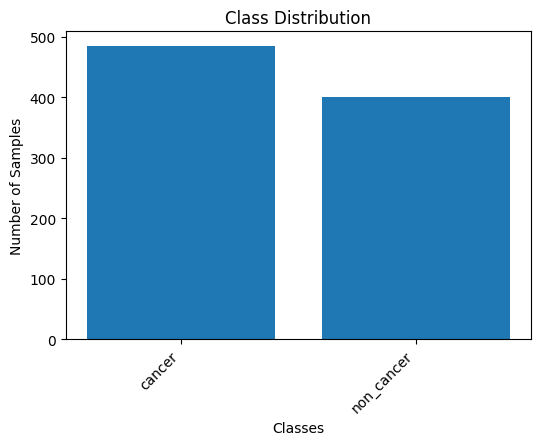

In [14]:
def plot_class_distribution(parent_dir):
    class_counts = {}
    
    for subdir in os.listdir(parent_dir):
        if os.path.isdir(os.path.join(parent_dir, subdir)):
            class_counts[subdir] = len(os.listdir(os.path.join(parent_dir, subdir)))

    plt.figure(figsize=(6, 4))
    plt.bar(class_counts.keys(), class_counts.values())
    plt.xlabel('Classes')
    plt.ylabel('Number of Samples')
    plt.title('Class Distribution')
    plt.xticks(rotation=45, ha='right')
    plt.show()

parent_directory = PATH + '/modified/modified'
plot_class_distribution(parent_directory)

### **Visual Inspection**

In [9]:
def plot_images(path, num_images=16, figsize=(8, 8), save_id=None):
    images = []
    for folder in os.listdir(path):
        folder_path = os.path.join(path, folder)
        for image_file in os.listdir(folder_path):
            image_path = os.path.join(folder_path, image_file)
            images.append((image_path, folder))

    plt.figure(figsize=figsize)
    for i in range(num_images):
        random_img = random.choice(images)
        img = plt.imread(random_img[0])
        plt.subplot(4, 4, i + 1)
        plt.axis('off')
        plt.title(random_img[1])
        plt.imshow(img)

    plt.tight_layout()

    plt.show()


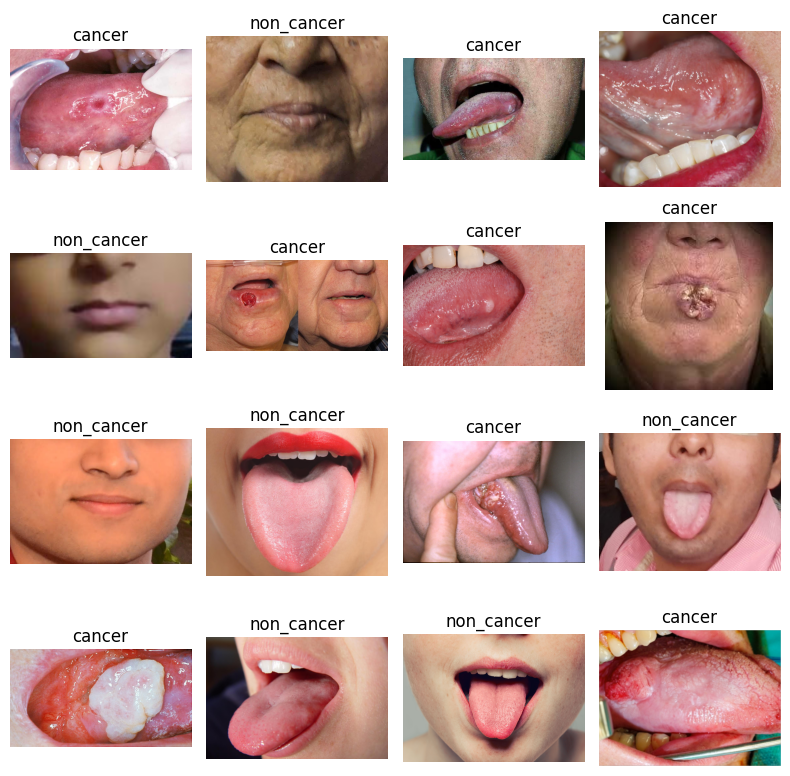

In [4]:
plot_images(DATASETS_PATH + '/tongue_lip')

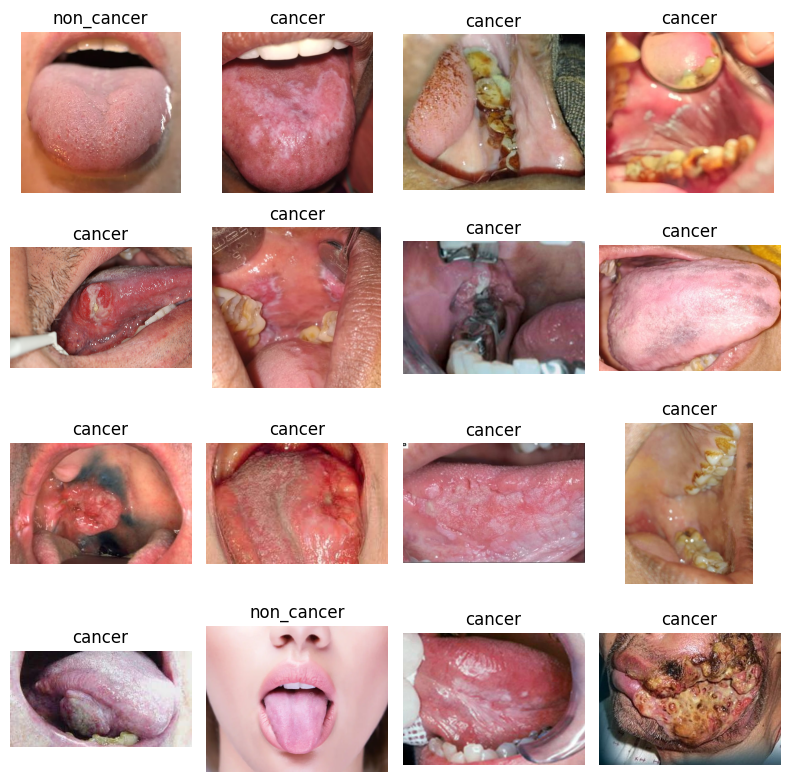

In [8]:
plot_images(DATASETS_PATH + '/oral_cancer')

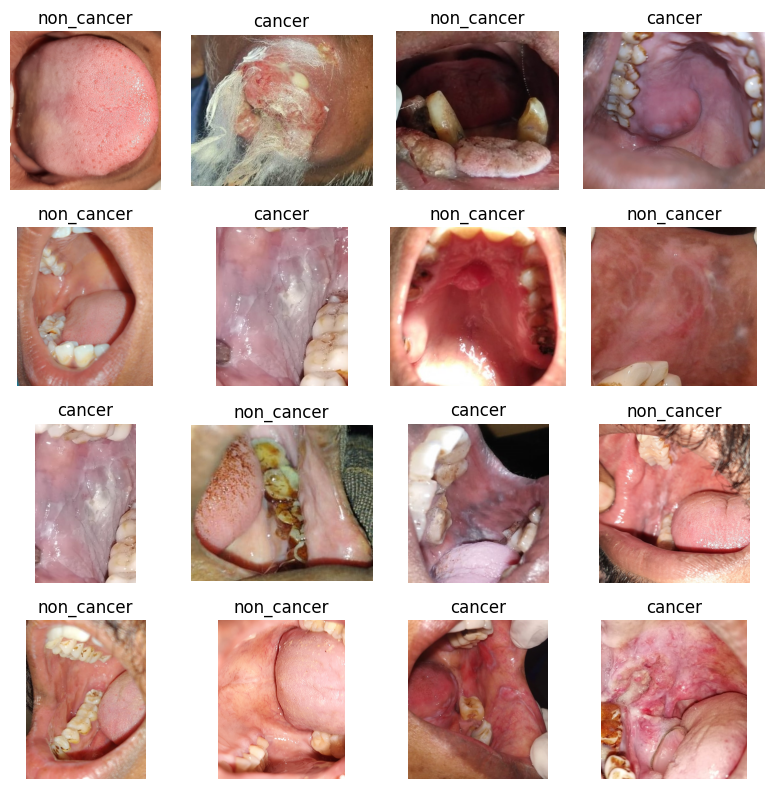

In [9]:
plot_images(DATASETS_PATH + '/mendley')

### **Image Statistics**

In [10]:
def compute_shape_statistics(directory):

    class_counts = {}
    total_images = 0
    class_shapes = {}

    for class_name in os.listdir(directory):
        class_path = os.path.join(directory, class_name)
        if os.path.isdir(class_path):
            class_images = []
            num_images = len(os.listdir(class_path))
            class_counts[class_name] = num_images
            total_images += num_images

            for image_name in os.listdir(class_path):
                image_path = os.path.join(class_path, image_name)
                image = cv2.imread(image_path)
                if image is not None:
                    class_images.append(image.shape[:2])

            class_images = np.array(class_images)
            class_shapes[class_name] = {
                "mean_shape": np.mean(class_images, axis=0).astype(int),
                "mode_shape": tuple(np.argmax(np.bincount(class_images[:, i].astype(int))) for i in range(2)),
                "min_shape": np.min(class_images, axis=0).astype(int),
                "max_shape": np.max(class_images, axis=0).astype(int)
            }

    all_shapes = np.vstack([shape for class_shape in class_shapes.values() for shape in class_shape.values()])
    overall_stats = {
        "mean_shape": np.mean(all_shapes, axis=0).astype(int),
        "mode_shape": tuple(np.argmax(np.bincount(all_shapes[:, i].astype(int))) for i in range(2)),
        "min_shape": np.min(all_shapes, axis=0).astype(int),
        "max_shape": np.max(all_shapes, axis=0).astype(int)
    }

    print("Data Overview:")
    print("Total classes:", len(class_counts))
    print("Total images:", total_images)
    print("Class Distribution:")
    for class_name, num_images in class_counts.items():
        print(f"{class_name}: {num_images} images")
        print("Class Shape Statistics:")
        class_stat = class_shapes[class_name]
        print("Mean shape:", class_stat["mean_shape"])
        print("Mode shape:", class_stat["mode_shape"])
        print("Minimum shape:", class_stat["min_shape"])
        print("Maximum shape:", class_stat["max_shape"])
        print()
    print("Overall Shape Statistics:")
    print("Mean shape:", overall_stats["mean_shape"])
    print("Mode shape:", overall_stats["mode_shape"])
    print("Minimum shape:", overall_stats["min_shape"])
    print("Maximum shape:", overall_stats["max_shape"])

In [11]:
def compute_pixel_statistics(directory):
    class_counts = defaultdict(int)
    mean_pixel_values = defaultdict(lambda: np.zeros(3))
    std_dev_pixel_values = defaultdict(lambda: np.zeros(3))
    min_pixel_values = defaultdict(lambda: np.ones(3) * float('inf'))
    max_pixel_values = defaultdict(lambda: np.ones(3) * float('-inf'))


    for class_name in os.listdir(directory):
        class_path = os.path.join(directory, class_name)
        if os.path.isdir(class_path):
     
            num_images = len(os.listdir(class_path))
            class_counts[class_name] = num_images

            for image_name in os.listdir(class_path):
                image_path = os.path.join(class_path, image_name)
                image = cv2.imread(image_path)
                if image is not None:
                    for channel in range(3):
                        mean_pixel_values[class_name][channel] += np.mean(image[:, :, channel])
                        std_dev_pixel_values[class_name][channel] += np.std(image[:, :, channel])
                        min_pixel_values[class_name][channel] = min(min_pixel_values[class_name][channel], np.min(image[:, :, channel]))
                        max_pixel_values[class_name][channel] = max(max_pixel_values[class_name][channel], np.max(image[:, :, channel]))

    print("\nImage Statistics:")
    for class_name in mean_pixel_values:
        print(f"\nClass: {class_name}")
        print("Mean Pixel Values:", mean_pixel_values[class_name] / class_counts[class_name])
        print("Standard Deviation Pixel Values:", std_dev_pixel_values[class_name] / class_counts[class_name])
        print("Minimum Pixel Values:", min_pixel_values[class_name])
        print("Maximum Pixel Values:", max_pixel_values[class_name])


In [59]:
compute_shape_statistics(DATASETS_PATH + '/tongue_lip')

Data Overview:
Total classes: 2
Total images: 131
Class Distribution:
cancer: 87 images
Class Shape Statistics:
Mean shape: [601 769]
Mode shape: (618, 1100)
Minimum shape: [168 225]
Maximum shape: [4032 3198]

non_cancer: 44 images
Class Shape Statistics:
Mean shape: [655 855]
Mode shape: (159, 1100)
Minimum shape: [159 200]
Maximum shape: [3002 4497]

Overall Shape Statistics:
Mean shape: [1174 1493]
Mode shape: (159, 1100)
Minimum shape: [159 200]
Maximum shape: [4032 4497]


In [61]:
compute_pixel_statistics(DATASETS_PATH + '/tongue_lip')


Image Statistics:

Class: cancer
Mean Pixel Values: [110.57973921 117.37001476 164.43159691]
Standard Deviation Pixel Values: [50.83646844 52.24876298 50.58856308]
Minimum Pixel Values: [0. 0. 0.]
Maximum Pixel Values: [255. 255. 255.]

Class: non_cancer
Mean Pixel Values: [101.13570328 113.27754158 161.6951227 ]
Standard Deviation Pixel Values: [43.16697912 45.54688942 49.75551734]
Minimum Pixel Values: [0. 0. 0.]
Maximum Pixel Values: [255. 255. 255.]


In [64]:
compute_shape_statistics(DATASETS_PATH + '/oral_cancer')

Data Overview:
Total classes: 2
Total images: 750
Class Distribution:
cancer: 500 images
Class Shape Statistics:
Mean shape: [624 688]
Mode shape: (205, 280)
Minimum shape: [96 93]
Maximum shape: [6936 9248]

non_cancer: 250 images
Class Shape Statistics:
Mean shape: [757 774]
Mode shape: (360, 800)
Minimum shape: [89 90]
Maximum shape: [4032 5461]

Overall Shape Statistics:
Mean shape: [1637 2179]
Mode shape: (89, 90)
Minimum shape: [89 90]
Maximum shape: [6936 9248]


In [66]:
compute_pixel_statistics(DATASETS_PATH + '/oral_cancer')


Image Statistics:

Class: cancer
Mean Pixel Values: [106.06092601 111.89902387 161.17365313]
Standard Deviation Pixel Values: [45.09705751 46.36264835 45.13761603]
Minimum Pixel Values: [0. 0. 0.]
Maximum Pixel Values: [255. 255. 255.]

Class: non_cancer
Mean Pixel Values: [114.85355004 122.59956082 171.64331459]
Standard Deviation Pixel Values: [50.1119956  51.46499705 52.0564427 ]
Minimum Pixel Values: [0. 0. 0.]
Maximum Pixel Values: [255. 255. 255.]


In [65]:
compute_shape_statistics(DATASETS_PATH + '/mendley')

Data Overview:
Total classes: 2
Total images: 323
Class Distribution:
cancer: 158 images
Class Shape Statistics:
Mean shape: [475 485]
Mode shape: (290, 343)
Minimum shape: [97 93]
Maximum shape: [1796 2165]

non_cancer: 165 images
Class Shape Statistics:
Mean shape: [993 974]
Mode shape: (584, 597)
Minimum shape: [ 96 129]
Maximum shape: [6936 9248]

Overall Shape Statistics:
Mean shape: [1408 1754]
Mode shape: (96, 93)
Minimum shape: [96 93]
Maximum shape: [6936 9248]


In [67]:
compute_pixel_statistics(DATASETS_PATH + '/mendley')


Image Statistics:

Class: cancer
Mean Pixel Values: [102.98333325 107.89292211 158.2622456 ]
Standard Deviation Pixel Values: [42.06843944 43.27939933 41.72405008]
Minimum Pixel Values: [0. 0. 0.]
Maximum Pixel Values: [255. 255. 255.]

Class: non_cancer
Mean Pixel Values: [106.90870612 117.31912405 163.32267374]
Standard Deviation Pixel Values: [43.27889576 44.41225666 43.43636192]
Minimum Pixel Values: [0. 0. 0.]
Maximum Pixel Values: [255. 255. 255.]


### **Further Analysis**

In [29]:
def plot_image_size_histograms(dataset_path):
    class_heights = {}
    class_widths = {}

    overall_heights = []
    overall_widths = []

    for folder_name in os.listdir(dataset_path):
        folder_path = os.path.join(dataset_path, folder_name)
        if not os.path.isdir(folder_path):
            continue

        heights = []
        widths = []

        for filename in os.listdir(folder_path):
            if filename.endswith(('.png', '.jpg', '.jpeg', '.bmp')):
                image_path = os.path.join(folder_path, filename)
                image = cv2.imread(image_path)
                if image is None:
                    continue
                height, width, _ = image.shape
                heights.append(height)
                widths.append(width)

        class_heights[folder_name] = heights
        class_widths[folder_name] = widths

        overall_heights.extend(heights)
        overall_widths.extend(widths)

    num_classes = len(class_heights)
    fig, axes = plt.subplots(num_classes + 1, 2, figsize=(12, (num_classes + 1) * 6))
    if num_classes == 1:
        axes = np.expand_dims(axes, axis=0)

    for i, (class_name, heights) in enumerate(class_heights.items()):
        ax1 = axes[i, 0]
        ax1.hist(heights, bins=20, color='skyblue', edgecolor='black')
        ax1.set_xlabel('Height')
        ax1.set_ylabel('Frequency')
        ax1.set_title(f'{class_name} Image Height Histogram')

        ax2 = axes[i, 1]
        ax2.hist(widths, bins=20, color='skyblue', edgecolor='black')
        ax2.set_xlabel('Width')
        ax2.set_ylabel('Frequency')
        ax2.set_title(f'{class_name} Image Width Histogram')

    overall_ax1 = axes[-1, 0]
    overall_ax1.hist(overall_heights, bins=20, color='skyblue', edgecolor='black')
    overall_ax1.set_xlabel('Height')
    overall_ax1.set_ylabel('Frequency')
    overall_ax1.set_title('Overall Image Height Histogram')

    overall_ax2 = axes[-1, 1]
    overall_ax2.hist(overall_widths, bins=20, color='skyblue', edgecolor='black')
    overall_ax2.set_xlabel('Width')
    overall_ax2.set_ylabel('Frequency')
    overall_ax2.set_title('Overall Image Width Histogram')

    plt.tight_layout()
    plt.show()



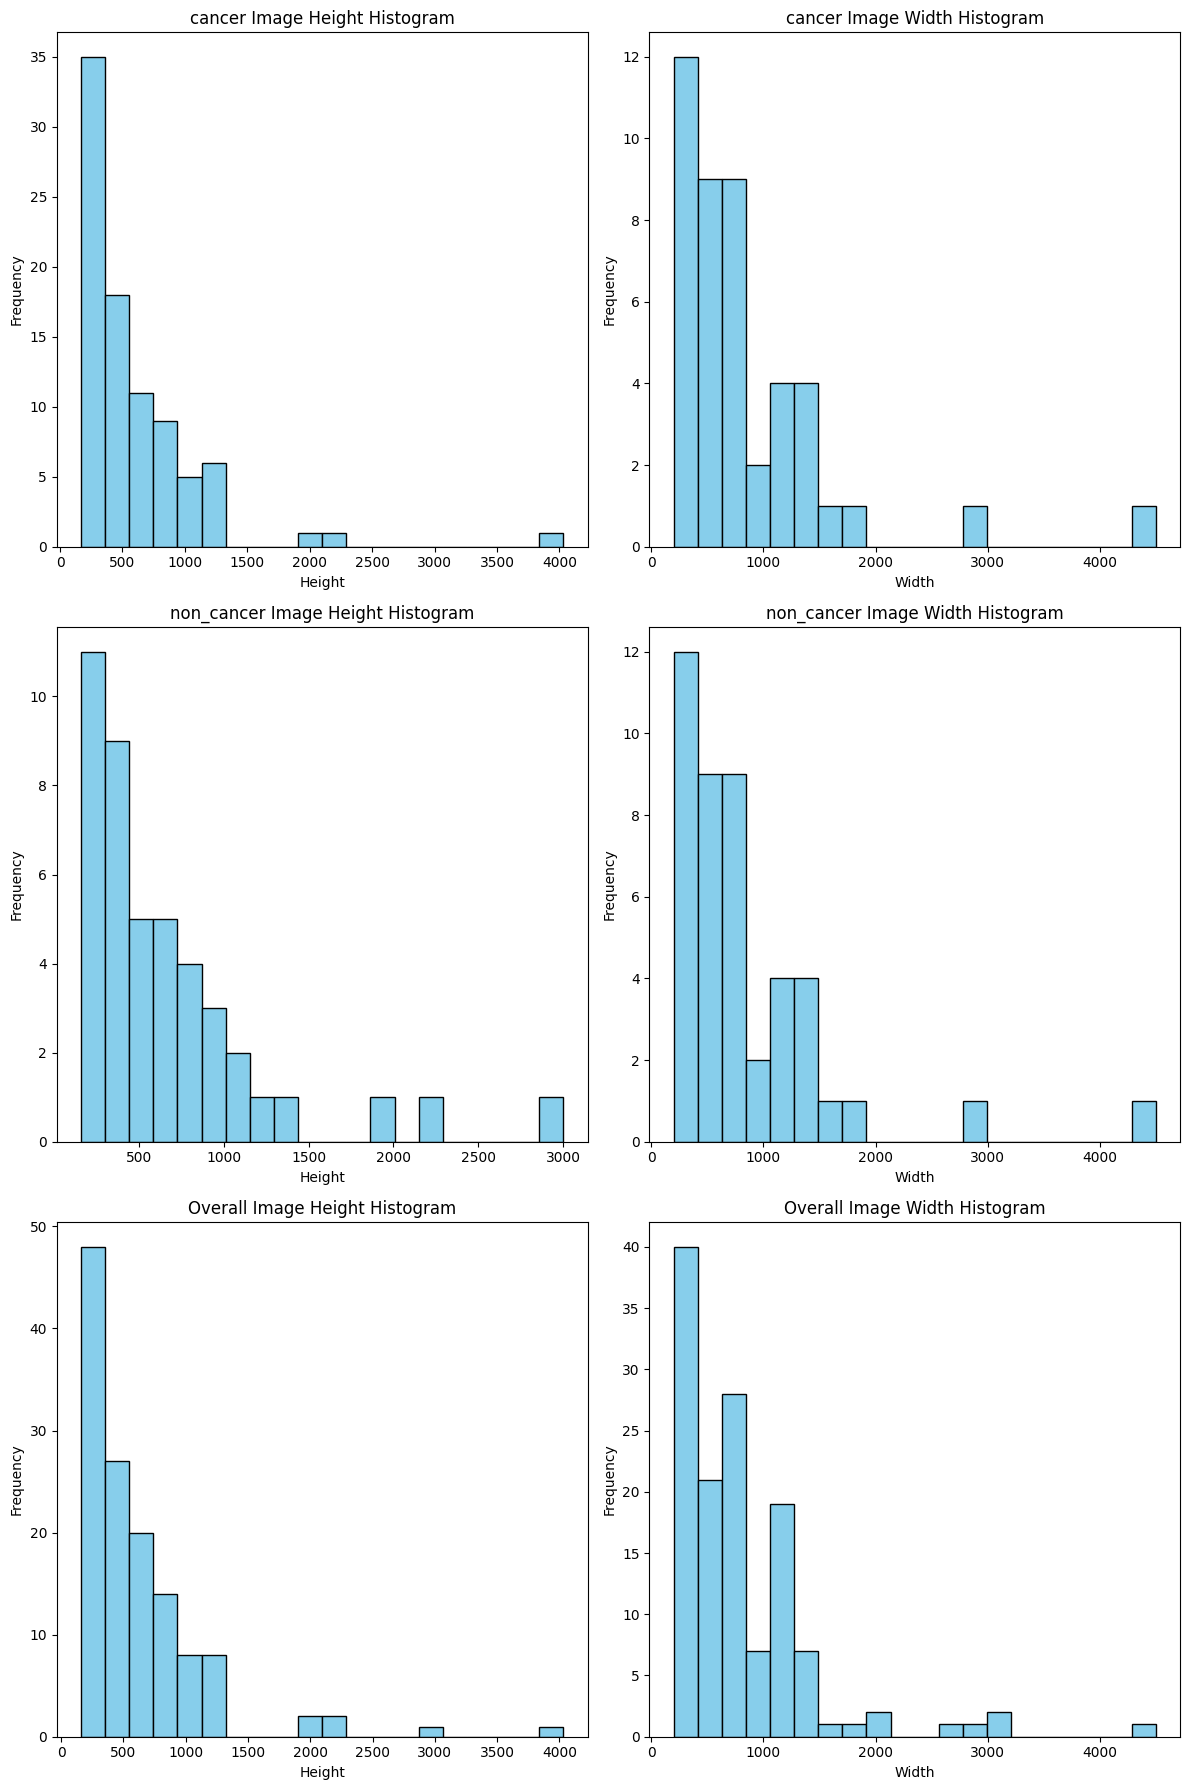

In [35]:
plot_image_size_histograms(DATASETS_PATH + '/tongue_lip')

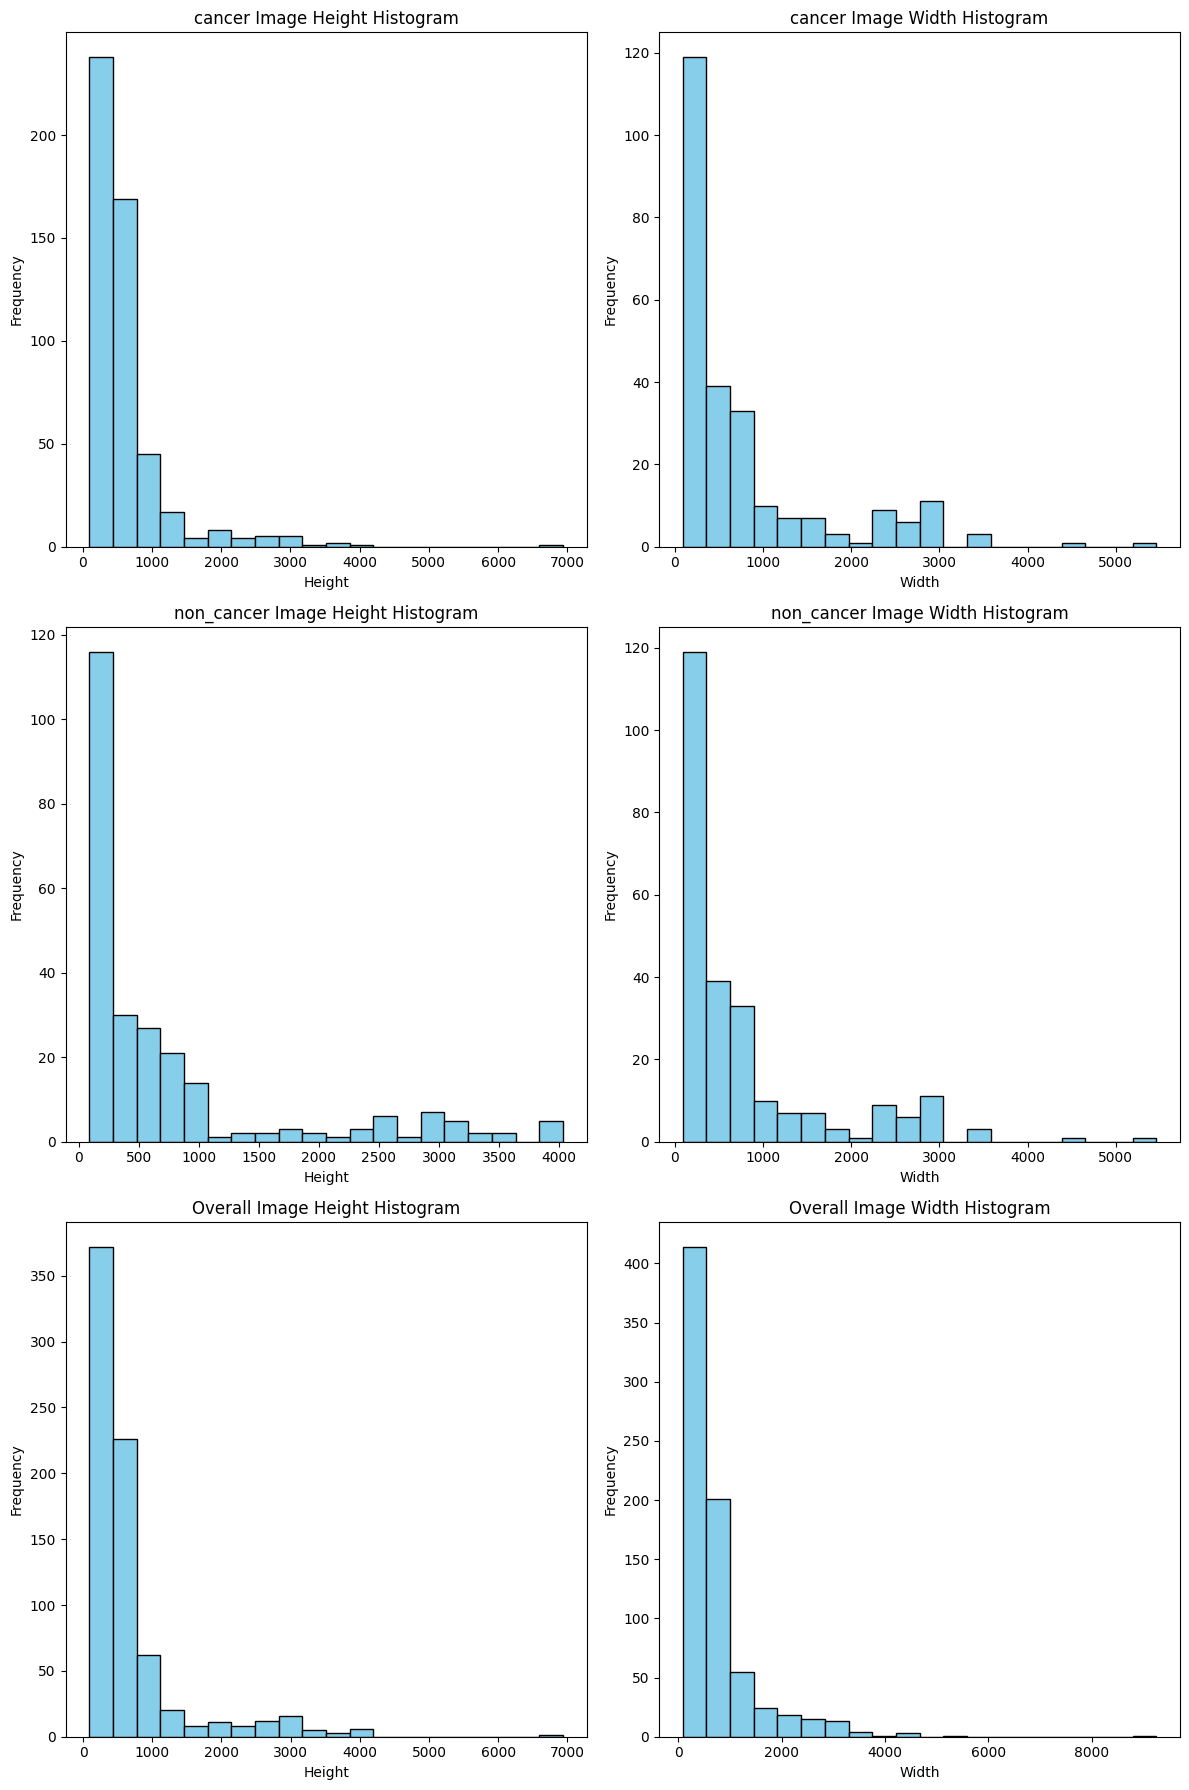

In [36]:
plot_image_size_histograms(DATASETS_PATH + '/oral_cancer')

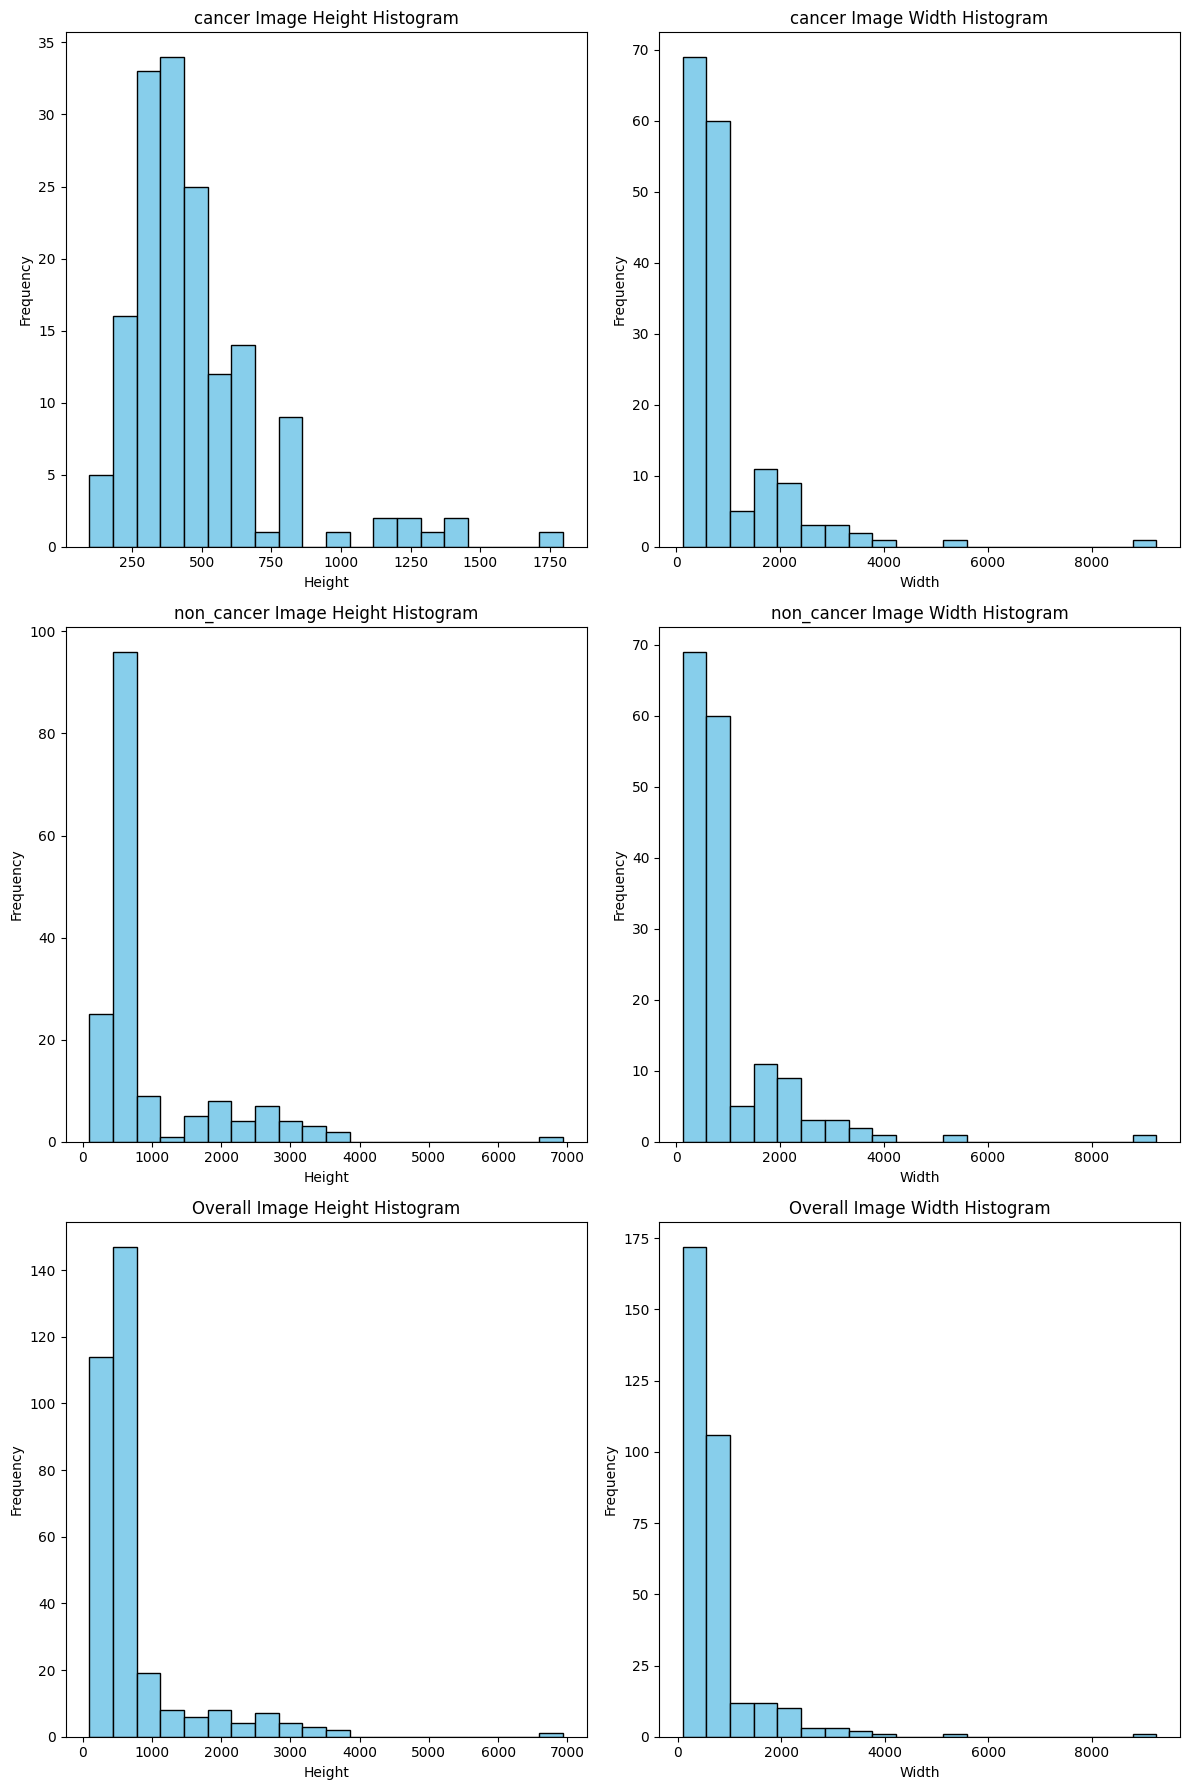

In [37]:
plot_image_size_histograms(DATASETS_PATH + '/mendley')

In [8]:
def interactive_image_size_scatter(dataset_path):
    data = []
    
    for folder_name in os.listdir(dataset_path):
        folder_path = os.path.join(dataset_path, folder_name)
        if not os.path.isdir(folder_path):
            continue

        for filename in os.listdir(folder_path):
            if filename.endswith(('.png', '.jpg', '.jpeg', '.bmp')):
                image_path = os.path.join(folder_path, filename)
                image = cv2.imread(image_path)
                if image is None:
                    continue
                height, width, _ = image.shape
                data.append({
                    'Category': folder_name,
                    'Filename': filename,
                    'Height': height,
                    'Width': width
                })

    df = pd.DataFrame(data)
    fig = px.scatter(df, x='Width', y='Height', color='Category', hover_data=['Filename'])
    fig.update_layout(title='Interactive Image Size Scatter Plot', xaxis_title='Width', yaxis_title='Height')
    fig.show()

In [12]:
interactive_image_size_scatter(DATASETS_PATH + '/tongue_lip')

In [6]:
interactive_image_size_scatter(DATASETS_PATH + '/oral_cancer')

In [7]:
interactive_image_size_scatter(DATASETS_PATH + '/mendley')


In [1]:
def analyze_image_shape_partitions_classwise(dataset_path, height_partitions, width_partitions):

    def proportion_in_partition(data, partition):
     
        lower_bound, upper_bound = partition
        within_partition = np.logical_and(data >= lower_bound, data <= upper_bound).sum()
        total_data = len(data)
        return within_partition / total_data

    def analyze_image_shapes_classwise(dataset_path):
      
        class_shapes = {}

        for class_name in os.listdir(dataset_path):
            class_path = os.path.join(dataset_path, class_name)
            if os.path.isdir(class_path):
                class_image_shapes = []

                for file_name in os.listdir(class_path):
                    file_path = os.path.join(class_path, file_name)
                    if os.path.isfile(file_path) and file_name.lower().endswith(('.png', '.jpg', '.jpeg', '.bmp', '.gif')):

                        image = cv2.imread(file_path)
                        if image is not None:

                            class_image_shapes.append((image.shape[0], image.shape[1]))

                class_image_shapes = np.array(class_image_shapes)
                class_shapes[class_name] = class_image_shapes

        return class_shapes

    class_shapes = analyze_image_shapes_classwise(dataset_path)

    proportions_classwise = {}

    for class_name, shapes in class_shapes.items():
        class_proportions = {
            'height': [],
            'width': []
        }
        for partition in height_partitions:
            proportion = proportion_in_partition(shapes[:, 0], partition)
            class_proportions['height'].append(proportion)

        for partition in width_partitions:
            proportion = proportion_in_partition(shapes[:, 1], partition)
            class_proportions['width'].append(proportion)

        proportions_classwise[class_name] = class_proportions

    return proportions_classwise

def plot_pie_chart(ax, partitions, labels, title):

    ax.pie(partitions, labels=labels, autopct='%1.1f%%', startangle=140)
    ax.set_title(title)


In [2]:
def proportion_check(dataset_path):
    height_partitions = [(0, 255), (256, 511), (512, 1023), (1024, np.inf)]
    width_partitions = [(0, 255), (256, 511), (512, 1023), (1024, np.inf)]

    proportions_classwise = analyze_image_shape_partitions_classwise(dataset_path, height_partitions, width_partitions)

    num_classes = len(proportions_classwise)
    fig, axs = plt.subplots(num_classes, 3, figsize=(12, 4*num_classes))

    for i, (class_name, proportions) in enumerate(proportions_classwise.items()):
    
        plot_pie_chart(axs[i][0], proportions['height'], [f"{p[0]}-{p[1]}" for p in height_partitions], f"{class_name} Height Proportions")
        plot_pie_chart(axs[i][1], proportions['width'], [f"{p[0]}-{p[1]}" for p in width_partitions], f"{class_name} Width Proportions")

        resolutions = (np.array(proportions['height'])**2)

        plot_pie_chart(axs[i][2], resolutions,  [f"{p[0]}^2-{p[1]}^2" for p in height_partitions], f"{class_name} Resolution Proportions")

    plt.tight_layout()
    plt.show()


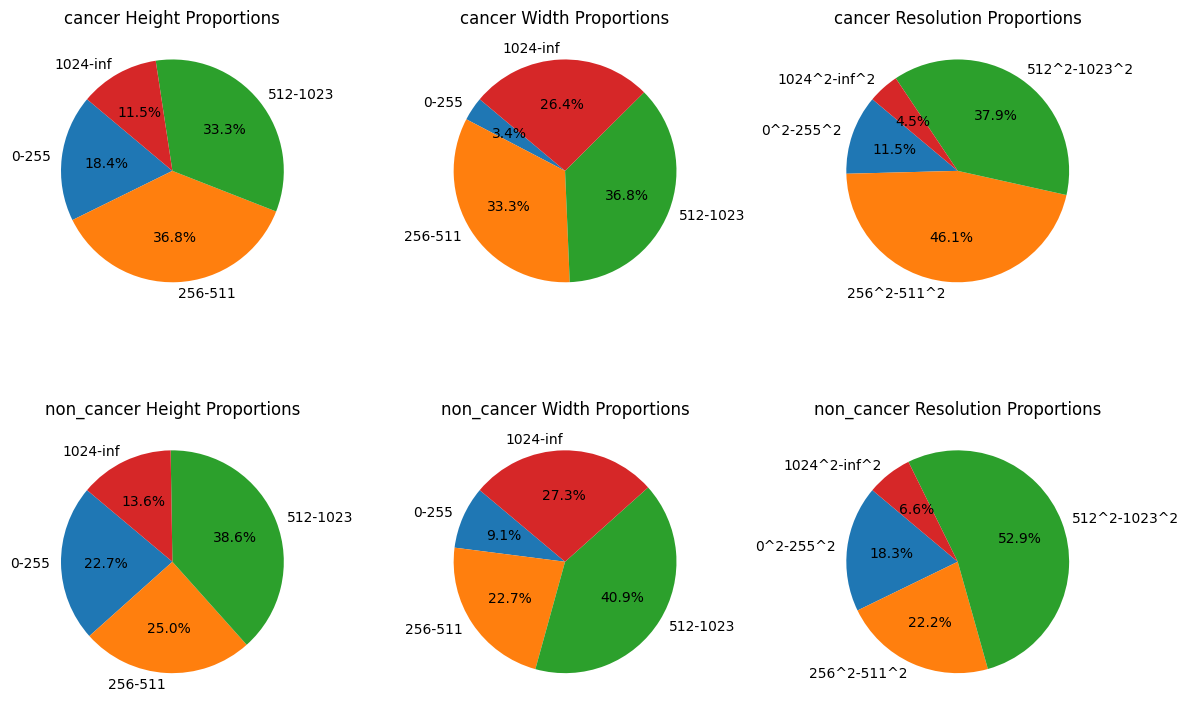

In [47]:
proportion_check(DATASETS_PATH + '/tongue_lip')

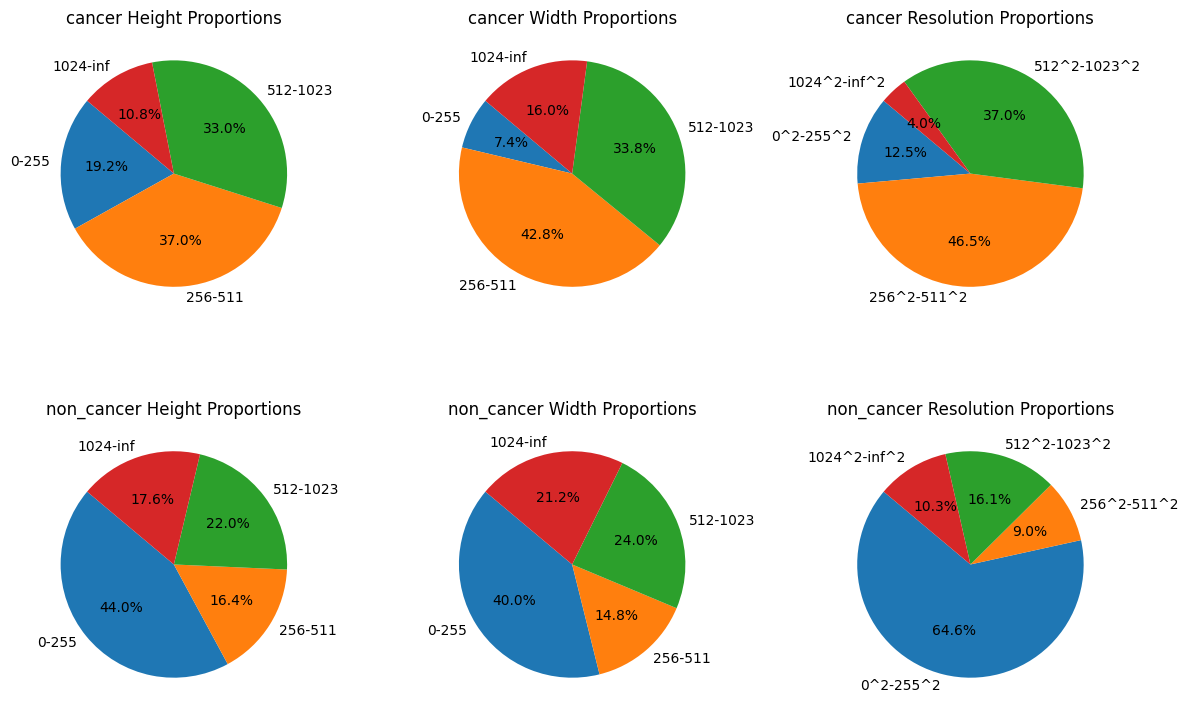

In [48]:
proportion_check(DATASETS_PATH + '/oral_cancer')

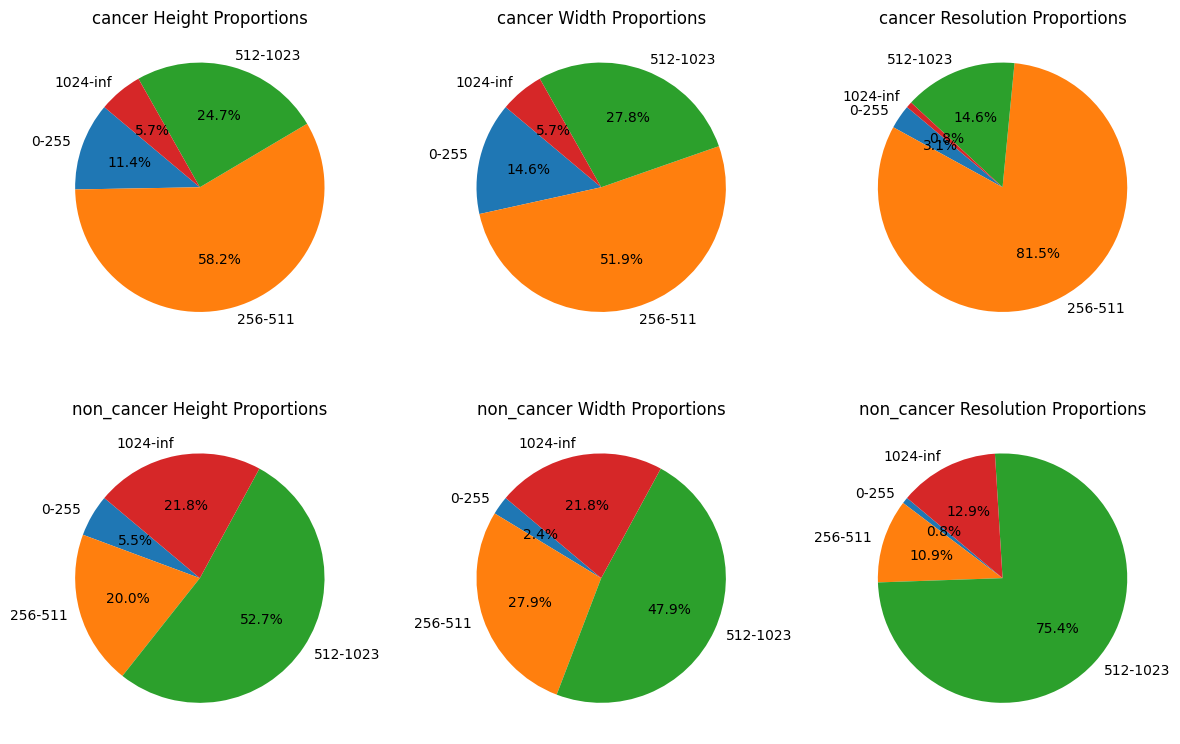

In [41]:
proportion_check(DATASETS_PATH + '/mendley')
